# MATH5271 Environmental Data Science and Statistics



## Week 3: Time Series I - Time domain



### Welcome to Week 3 of MATH5271. This session is the first of two on time series analysis. By the end of this session you should understand:

- Utility of both time domain and frequency domain methods;
- How to model discrete data using Multi-state Markov Chain models;
- How to model continuous data using auto-regression models.

## Terminology

What do the following terms mean?

- Steady
- Stationairy
- Cyclical
- Ergodic*

## In terms of time series terminology, how would you describe the following processes:

- El Nino Southern Oscilation measured over a decade;
- Rain drops falling on your roof during a constant shower;
- A large Himalayan Glacier measured annually over 10 years;
- Sea ice coverage in the Arctic Ocean.

## Time Series Models

Unlike in Statistical Forecasting where we had either a proxy (e.g. nearby temperature) or a process based model (e.g. Numerical Weather Prediction) with which to make a model. In time series analysis we aim to understand, and potentially predict, the behaviour of a single time series. There are two approaches we will discuss:

- Time domain analysis;
- Frequency domain or Harmonic analysis.




## Time Domain

Future State = f(previous state, earlier state, even earlier state...)

## Frequency Domain

Future State = Stage in cycle 1 + Stage in cycle 2 + ... 

## Setup and Load Data

Before we get started we need to ensure we have the appropriate 'libraries' are installed. The .csv files we upload will be uploaded into a 'pandas' data frame. We will use the 'numpy' (numerical python) package to do some basic maths with the data and Matplotlib's 'pyplot' package to make some pretty graphs. 

In [2]:
# import libraries
import pandas as pd

# Numerics
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# plot figures in Colaboratory notebook
%matplotlib inline

# Define the URL where the data set is stored
TableA1_url = 'https://raw.githubusercontent.com/janzika/MATH5271/main/Wilks_TableA1.csv' 

# Import the data set as a Pandas Dataframe using the 'read_csv' function
df1 = pd.read_csv(TableA1_url)

# Subset just the Ithaca and Canandaigua data
idf = df1[df1['Location'].isin(['Ithaca'])]
cdf = df1[df1['Location'].isin(['Canandaigua'])]

# Define a new column with logical 0 for no rain and 1 for rain
idf.insert(4,"Rain",[1 if x > 0 else 0 for x in idf.Precip_inch])

#Copy the data frame from the 2nd of January and add a 'rained yesterday' columnx
idf2 = idf[1:].copy()
idf2.insert(5,"Rain_Yesterday",idf.Rain[0:-1].values)

# Time domain

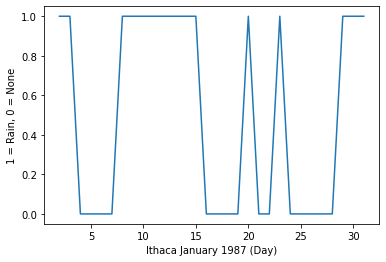

In [3]:
plt.plot(idf2.Date,idf2.Rain)
plt.xlabel('Ithaca January 1987 (Day)');
plt.ylabel('1 = Rain, 0 = None'); 

### How could we model this?

## Markov Chain

![MarkovChain.png](https://github.com/janzika/MATH5271/blob/main/Lecture%203/MarkovChain.png?raw=true)

In [4]:
idf2

,Year,Month,Date,Precip_inch,Rain,Rain_Yesterday,MaxTemp_Far,MinTemp_Far,Location
1,1987,1,2,0.07,1,0,32,25,Ithaca
2,1987,1,3,1.11,1,1,30,22,Ithaca
3,1987,1,4,0.00,0,1,29,-1,Ithaca
4,1987,1,5,0.00,0,0,25,4,Ithaca
5,1987,1,6,0.00,0,0,30,14,Ithaca
6,1987,1,7,0.00,0,0,37,21,Ithaca
7,1987,1,8,0.04,1,0,37,22,Ithaca
8,1987,1,9,0.02,1,1,29,23,Ithaca
9,1987,1,10,0.05,1,1,30,27,Ithaca
10,1987,1,11,0.34,1,1,36,29,Ithaca


## Quantifying the probability of a state transition

$p_{00}$ is the probability that being in state zero (no rain) at the previous step (day) that it will stay in that state (no rain) for the next step (day).

$$p_{00} = Pr\{X_{t+1} = 0 | X_t = 0\} \approx \frac{n_{00}}{n_{00} + n_{01}}$$

likewise

$$p_{01} = Pr\{X_{t+1} = 1 | X_t = 0\} \approx \frac{n_{01}}{n_{00} + n_{01}} = 1 - p_{00}$$

etc

In [11]:
# Find the number of transitions between each state
n00 = idf2[(idf2.Rain_Yesterday==0) & (idf2.Rain==0)].shape[0]
n01 = idf2[(idf2.Rain_Yesterday==0) & (idf2.Rain==1)].shape[0]
n10 = idf2[(idf2.Rain_Yesterday==1) & (idf2.Rain==0)].shape[0]
n11 = idf2[(idf2.Rain_Yesterday==1) & (idf2.Rain==1)].shape[0]

p00 = n00/(n00+n01)
p11 = n11/(n10+n11)

print(p00,p11)

0.6875 0.7142857142857143


In [13]:


n0d = n00+n01
n1d = n10+n11
nd0 = n00+n10
nd1 = n01+n11

n = n0d+n1d

p01 = n01/n0d
p10 = n10/n1d

e00 = n0d*nd0/n
e01 = n0d*nd1/n
e10 = n1d*nd0/n
e11 = n1d*nd1/n

In [14]:
#Define markov chain model to generate rainfall timeseries
#Input the rain data and the length desired
def makemarkov(idf2,n): 
    #Subset the rain data into cases where it didn't and did rain the day before
    after_norain = idf2.Rain[(idf2.Rain_Yesterday==0)].values 
    after_rain = idf2.Rain[(idf2.Rain_Yesterday==1)].values
    # Pre-allocate the variable
    markov = np.zeros([n,])
    # Choose the first value randomly from the whole month
    markov[0]=np.random.choice(idf2.Rain.values)
    for i in np.arange(0,n-1):
        #When it didnt rain previously, randomly choose from no rain cases
        if markov[i] == 0:
            markov[i+1] = np.random.choice(after_norain)
        #Else choose from rain cases
        else:
            markov[i+1] = np.random.choice(after_rain)
    return markov

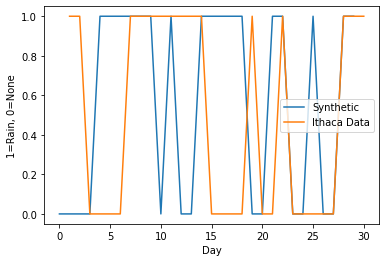

In [50]:
# Run and display the synthetic timeseries
markov = makemarkov(idf2,n)   
plt.plot(markov,label='Synthetic')
plt.plot(idf2.Rain,label='Ithaca Data')
plt.xlabel('Day');plt.ylabel('1=Rain, 0=None'); plt.legend()

In [55]:
#Define a model to generate serieally independent timeseries
#Input the rain data and the length desired
#Input the rain data and the length desired
def makeindep(idf2,n):
    indep = np.zeros([n,1])
    indep[0]=np.random.choice(idf2.Rain.values)
    for i in np.arange(0,n-1):
        indep[i+1] = np.random.choice(idf2.Rain.values)
    return indep

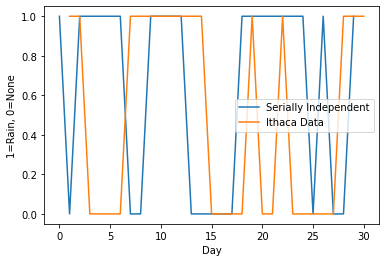

In [56]:
indep = makeindep(idf2,n)
   
plt.plot(indep,label='Serially Independent')
plt.plot(idf2.Rain,label='Ithaca Data')
plt.xlabel('Day');plt.ylabel('1=Rain, 0=None'); plt.legend()


## Test Statistic

$$\chi^2 = \sum_i \sum_j \frac{(n_{ij}-e_{ij})^2}{e_{ij}}$$
where
$$e_{ij} = \frac{n_{i\cdot}-n_{\cdot j}}{n}.$$

![MarkovChain.png](https://github.com/janzika/MATH5271/blob/main/Lecture%203/Chi2Test.png?raw=true)

In [57]:
# Find the number of transitions between each state
def Chisq(yesterday,today):
    n00 = yesterday[(yesterday==0) & (today==0)].shape[0]
    n01 = yesterday[(yesterday==0) & (today==1)].shape[0]
    n10 = yesterday[(yesterday==1) & (today==0)].shape[0]
    n11 = yesterday[(yesterday==1) & (today==1)].shape[0]
    
    n0d = n00+n01
    n1d = n10+n11
    nd0 = n00+n10
    nd1 = n01+n11
    
    n = n0d+n1d
    
    p00 = n00/n0d
    p01 = n01/n0d
    p10 = n10/n1d
    p11 = n11/n1d
    
    e00 = n0d*nd0/n
    e01 = n0d*nd1/n
    e10 = n1d*nd0/n
    e11 = n1d*nd1/n

    Xi2 = (n00-e00)**2/e00 + (n10-e10)**2/e10 + \
    (n01-e01)**2/e01 + (n11-e11)**2/e11
    return Xi2

Chisq_Ith = Chisq(idf2.Rain_Yesterday,idf2.Rain)

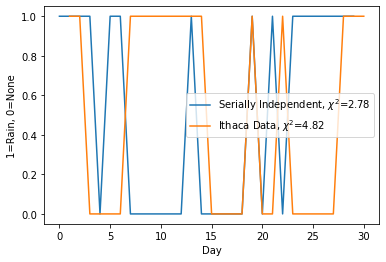

In [112]:
indep = makeindep(idf2,n)
Chisq_indep = Chisq(indep[:-1],indep[1:])
    
plt.plot(indep,label='Serially Independent, $\chi^2$='+str(np.round(Chisq_indep,2)))
plt.plot(idf2.Rain,label='Ithaca Data, $\chi^2$='+str(np.round(Chisq_Ith,2)))
plt.xlabel('Day');plt.ylabel('1=Rain, 0=None'); plt.legend()

## Multiple-state Markov Chains (3 states or more)

![MarkovChain.png](https://github.com/janzika/MATH5271/blob/main/Lecture%203/Multi-markov.png?raw=true)

### What natural processes could be described?

# Autoregression

Many processes of interest are described by continuous variables (temperature, concentration, intensity etc.). 

Autoregressive models combine the concept of linear regression models with time series. Effectively we can correlate the state at a previous time with a future time. Consider the minimum temperature at Canandaigua. Does it look random?





<AxesSubplot:xlabel='Date'>

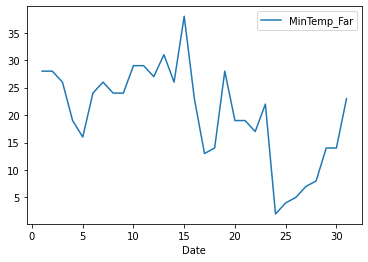

In [634]:
cdf.plot("Date","MinTemp_Far")

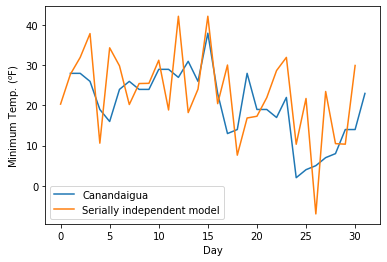

In [141]:
# Calculate statistics of Canandaigua timeseries
xbar = cdf.MinTemp_Far.values.mean() #mean Temp
sigx = cdf.MinTemp_Far.std()         #std of Temp
# Generate random timeseries
RND = np.zeros([n,1])
for i in np.arange(0,n):
    RND[i] = np.random.normal(xbar,sigx) #assume normal distribution
# Compare random and original timeseries
plt.plot(cdf.Date,cdf.MinTemp_Far,label='Canandaigua')       
plt.plot(RND,label='Serially independent model')
plt.xlabel('Day');plt.ylabel('Minimum Temp. ($^o$F)'); 
plt.legend()

In [115]:
# Calculate b and a
x0 = cdf.MinTemp_Far.values[:-1]
x1 = cdf.MinTemp_Far.values[1:]
n = x0.shape[0]
phi = (n*np.sum(x0*x1)-np.sum(x0)*np.sum(x1))\
/(n*np.sum(x0**2)-((np.sum(x0))**2))
mu = x1.mean()
#a = x0.mean() - phi*x0.mean()
# Determine the least squares guess at 'y' (the Canandaigua temperature)
x1_lr = phi*(x0-mu)+mu;

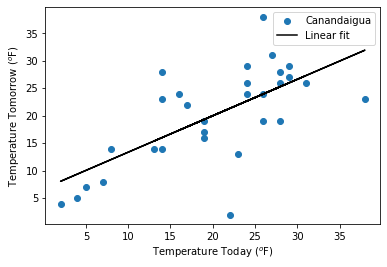

In [116]:
x0 = cdf.MinTemp_Far.values[:-1]; x1 = cdf.MinTemp_Far.values[1:]
plt.scatter(x0,x1,label='Canandaigua'); 
plt.plot(x0,x1_lr,'k',label='Linear fit')
plt.xlabel('Temperature Today ($^o$F)')
plt.ylabel('Temperature Tomorrow ($^o$F)')
plt.legend()

# Cross-correlation and Autocorrelation

Recall from week 2 that the slope of the linear regression fit for $y$ based on $x$ was

$$ b = \frac{\sum_{i=1}^n \left[ (x_i - \overline{x})((y_i - \overline{y})\right]}{\sum_{i=1}^n (x_i - \overline{x})^2}. $$

This is the correlation coefficient. As well as correlating two different variables (cross-correlation) we can correlate a variable with itself at different times (auto-correlation). I.e. for time lag 1 we have 

$$ r_1 = \frac{\sum^{n-1}_{i=1}[(x_i - \overline{x}_-)(x_{i+1} - \overline{x}_+)]}{[\sum^{n-1}_{i=1}(x_i - \overline{x}_-)^2]^{1/2}[\sum^{n}_{i=2}(x_{i} - \overline{x}_+)^2]^{1/2}} $$

where $\overline{x}_-$ and $\overline{x}_+$ are averages over the first and last $n-1$ values respectively. 


# Autocovariance function

We can generalise to lag-k such that

$$ r_k = \frac{\sum^{n-k}_{i=1}[(x_i - \overline{x}_-)(x_{i+k} - \overline{x}_+)]}{[\sum^{n-k}_{i=1}(x_i - \overline{x}_-)^2]^{1/2}[\sum^{n}_{i=k+1}(x_{i} - \overline{x}_+)^2]^{1/2}}. $$

This is also known as the autocovariance function. 

In [117]:
x = cdf.MinTemp_Far.values
n = x.shape[0]; 
M=7
r = np.ones([M+1,1])
for k in np.arange(1,M+1):
    xmns = x[:n-k].mean();xpls = x[-(n-k):].mean()
    r[k] = np.sum((x[:n-k]-xmns)*(x[-(n-k):]-xpls))/\
    (np.sqrt(np.sum((x[:n-k]-xmns)**2))*np.sqrt(np.sum((x[-(n-k):]-xpls)**2)))

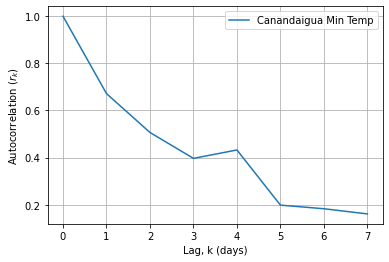

In [118]:
plt.plot(r,label='Canandaigua Min Temp')
plt.xlabel('Lag, k (days)')
plt.ylabel('Autocorrelation ($r_k$)')
plt.legend()
plt.grid()

# AR(1) model

The AR(1) model is essentially the same as the 1st order linear regression model but is typically framed as follows

$$x_{t+1} - \overline{x} = \phi(x_t-\overline{x}) + \epsilon_{t+1}$$

Where $\epsilon$ is assumed to be a normally distributed with $\sigma^2_{\epsilon}=(1-\phi^2)\sigma^2_x$.

In the AR(1) case 
$$\phi = r_1.$$
It is important to note that this doesn't hold at higher orders. 

What if $|r_1|>1$?


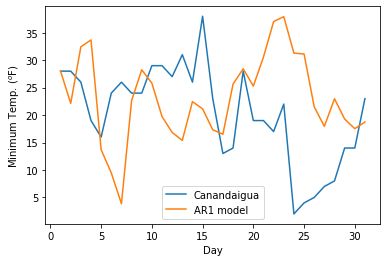

In [152]:
# Generate AR(1) timeseries
# Calculate parameters
phi=r[1]; sige = np.sqrt((1-phi**2)*sigx**2)
#Pre-allocate
AR1 = np.zeros([n,])
#Set 1st value as Canandaigua
AR1[0]=cdf.MinTemp_Far.values[0]
for i in np.arange(0,n-1):
    AR1[i+1] = phi*(AR1[i]-xbar)+np.random.normal(0,sige)+xbar
# Compare AR1 and original timeseries
plt.plot(cdf.Date,cdf.MinTemp_Far,label='Canandaigua')       
plt.plot(cdf.Date,AR1,label='AR1 model')
plt.xlabel('Day');plt.ylabel('Minimum Temp. ($^o$F)'); plt.legend()

## AR(2) model

An AR(2) model is the same as second order multiple linear regression

$$x_{t+1} - \overline{x} = \phi_1(x_t-\overline{x})+\phi_2(x_{t-1}-\overline{x}) + \epsilon_{t+1}.$$

Again $\epsilon$ is assumed to be a normally distributed and should be smaller.

In the AR(2) (and higher order) case(s) 
$$\phi_1 \neq r_1.$$

We must solve the simultaneous equations:
$$r_1 = \hat{\phi}_1 +\hat{\phi}_2 r_1,\\
r_2 = \hat{\phi}_1r_1 +\hat{\phi}_2.$$



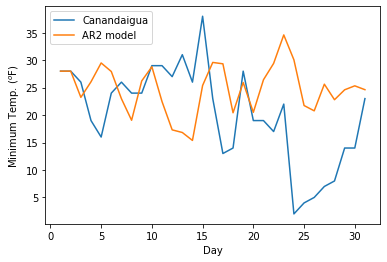

In [176]:
# Generate AR(2) timeseries
# Calculate parameters
phi1=r[1]*(1-r[1])/(1-r[1]**2);
phi2=(r[2]-r[1]**2)/(1-r[1]**2);
sige = np.sqrt((1-phi2**2)*((n-1)/(n-2))*(1-r[1])*sigx**2)
#Pre-allocate
AR2 = np.zeros([n,])
#Set 1st and 2nd value as Canandaigua
AR2[0]=cdf.MinTemp_Far.values[0]
AR2[1]=cdf.MinTemp_Far.values[1]
for i in np.arange(1,n-1):
    AR2[i+1] = phi1*(AR2[i]-xbar)+phi2*(AR2[i-1]-xbar)+np.random.normal(0,sige)+xbar
# Compare AR1 and original timeseries
plt.plot(cdf.Date,cdf.MinTemp_Far,label='Canandaigua')       
plt.plot(cdf.Date,AR2,label='AR2 model')
plt.xlabel('Day');plt.ylabel('Minimum Temp. ($^o$F)'); plt.legend()

# Higher order autoregressive models

Again AR(k) models are effectively multiple linear regression

$$x_{t+1} - \overline{x} = \phi_1(x_t-\overline{x})+\phi_2(x_{t-1}-\overline{x}) +\phi_3(x_{t-2}-\overline{x})+...+ \epsilon_{t+1}.$$

The coefficients ($\phi_k$) can either be determined by least squares or by solving what are called the $Yule-Walker$ equations:

$$r_1 = \hat{\phi}_1 +\hat{\phi}_2 r_1 + .. + \hat{\phi}_K r_{K-1};\\
r_2 = \hat{\phi}_1r_1 +\hat{\phi}_2 + .. + \hat{\phi}_K r_{K-2};\\
r_3 = \hat{\phi}_1r_2 +\hat{\phi}_2 r_1 + .. + \hat{\phi}_K r_{K-3};\\
...\\
r_K = \hat{\phi}_1r_{K-1} +\hat{\phi}_2r_{K-2} + .. + \hat{\phi}_K.$$

These can be solved using linear algebra as a system where

$${\bf r} = A\, [\phi_1\,\phi_2\,...\,\phi_K]^T $$







In [134]:
K=6
A = np.ones([K,K])
for i in np.arange(0,K):
    A[i:,i] = r[:K-i,0] #np.arange(0,K-i)#
    A[np.arange(i,-1,-1),i]=r[0:i+1,0]#np.arange(0,i+1)#
    
phi = np.linalg.solve(A.transpose(),r[1:K+1])

# How to know how many lags to include?

When chossing the best model it is common to trade off model complexity with model accuracy. Why use a complicated model when a simpler model does just as well (e.g. Occam's Razor). 

To information criteria balance these are these desires: Baysian Information Criterion (BIC) and Akaike Information Criterion (AIC). In the case AR(m) models we have

$$ BIC(m) = n \ln[\frac{n}{n-m-1}s^2_{\epsilon}(m)] + (m+1)\ln(n) $$

and

$$ AIC(m) = n \ln[\frac{n}{n-m-1}s^2_{\epsilon}(m)] + 2(m+1) $$

![BICvsAIC.png](https://github.com/janzika/MATH5271/raw/main/Lecture%203/BICvsAIC.png?raw=true)

## Summary

We have discussed:

*   Simple Markov Chain based models for two states and higher;
*   Autoregressive models and their link to linear regression;
* How to assess models against a nul hypothesis and tools for choosing model complexity.
